In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

calls = pd.read_csv('/kaggle/input/skyhack/calls.csv')
customers = pd.read_csv('/kaggle/input/skyhack/customers.csv')
reason = pd.read_csv('/kaggle/input/skyhack/reason.csv')
sentiment_statistics = pd.read_csv('/kaggle/input/skyhack/sentiment_statistics.csv')
test = pd.read_csv('/kaggle/input/skyhack/test.csv')

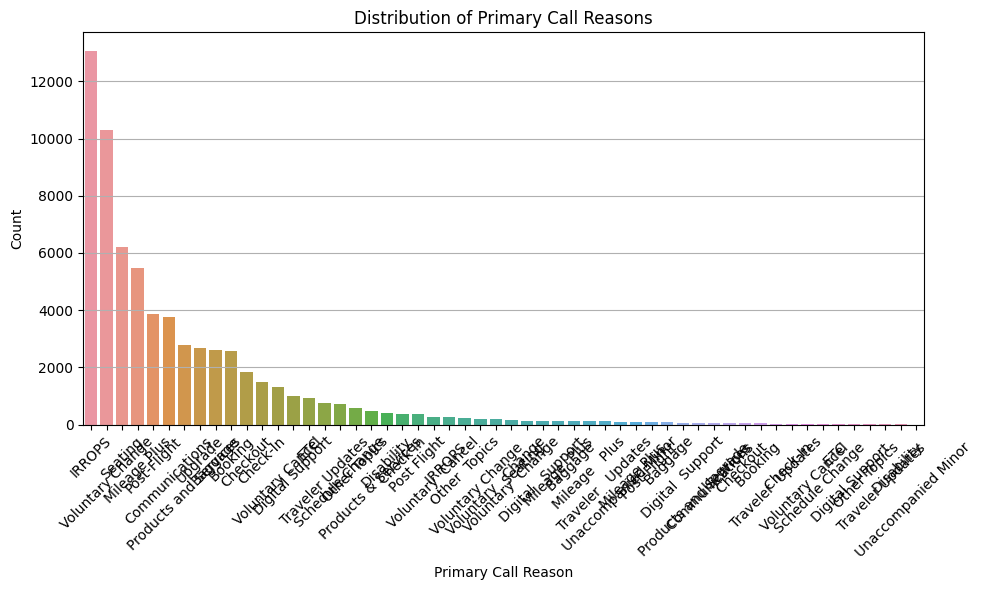

In [4]:
calls['call_start_datetime'] = pd.to_datetime(calls['call_start_datetime'])
calls['agent_assigned_datetime'] = pd.to_datetime(calls['agent_assigned_datetime'])
calls['call_end_datetime'] = pd.to_datetime(calls['call_end_datetime'])

# Calculating handle_time and answer_time
calls['handle_time'] = calls['call_end_datetime'] - calls['agent_assigned_datetime']
calls['answer_time'] = calls['agent_assigned_datetime'] - calls['call_start_datetime']

merged_df = calls.merge(reason, on='call_id', how='inner')

# Step 1: Group by 'primary_call_reason' and calculate the average handling time
average_handling_time = merged_df.groupby('primary_call_reason')['handle_time'].mean().reset_index()

# Step 2: Convert handling_time to total seconds for easier plotting
average_handling_time['handle_time_seconds'] = average_handling_time['handle_time'].dt.total_seconds()

# Plot the distribution of primary call reasons
plt.figure(figsize=(10, 6))
sns.countplot(data=merged_df, x='primary_call_reason', order=merged_df['primary_call_reason'].value_counts().index)
plt.title('Distribution of Primary Call Reasons')
plt.xlabel('Primary Call Reason')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

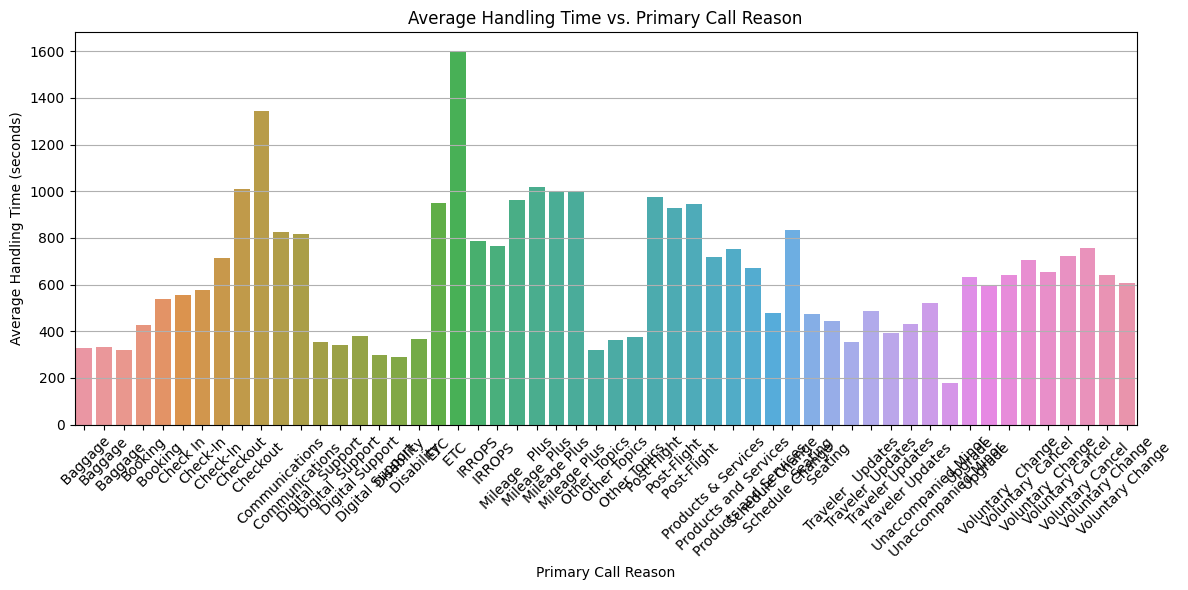

In [5]:
# Step 1: Group by 'primary_call_reason' and calculate the average handling time
average_handling_time = merged_df.groupby('primary_call_reason')['handle_time'].mean().reset_index()

# Step 2: Convert handling_time to total seconds for easier plotting
average_handling_time['handle_time_seconds'] = average_handling_time['handle_time'].dt.total_seconds()

# Step 3: Plot Average Handling Time vs. Primary Call Reason
plt.figure(figsize=(12, 6))
sns.barplot(x='primary_call_reason', y='handle_time_seconds', data=average_handling_time)
plt.title('Average Handling Time vs. Primary Call Reason')
plt.xlabel('Primary Call Reason')
plt.ylabel('Average Handling Time (seconds)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

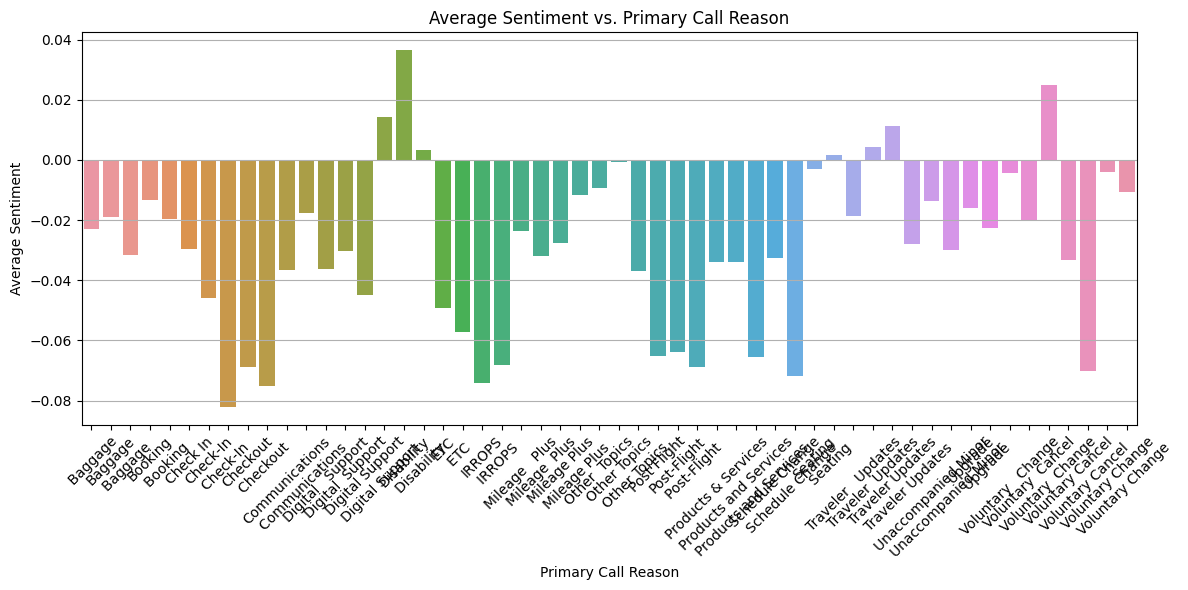

In [7]:
merged_df = merged_df.merge(sentiment_statistics, on='call_id', how='inner')
# Step 1: Group by 'primary_call_reason' and calculate the average sentiment
average_sentiment = merged_df.groupby('primary_call_reason')['average_sentiment'].mean().reset_index()

# Step 2: Plot Average Sentiment vs. Primary Call Reason
plt.figure(figsize=(12, 6))
sns.barplot(x='primary_call_reason', y='average_sentiment', data=average_sentiment)
plt.title('Average Sentiment vs. Primary Call Reason')
plt.xlabel('Primary Call Reason')
plt.ylabel('Average Sentiment')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


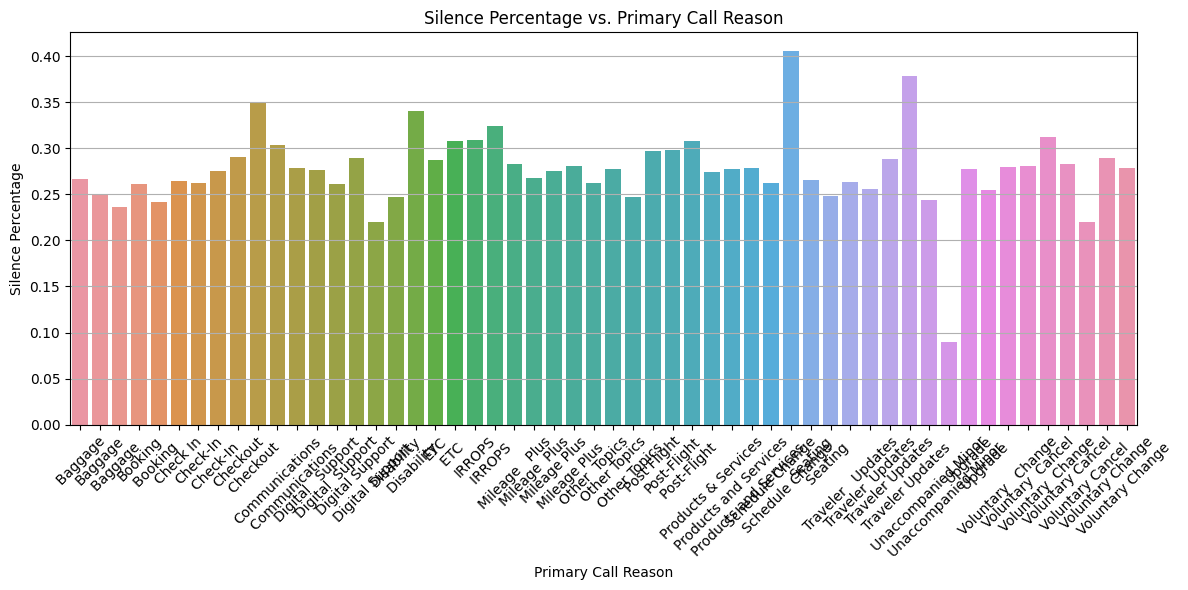

In [8]:
# Step 1: Group by 'primary_call_reason' and calculate the average silence percentage
average_silence = merged_df.groupby('primary_call_reason')['silence_percent_average'].mean().reset_index()

# Step 2: Plot Silence Percentage vs. Primary Call Reason
plt.figure(figsize=(12, 6))
sns.barplot(x='primary_call_reason', y='silence_percent_average', data=average_silence)
plt.title('Silence Percentage vs. Primary Call Reason')
plt.xlabel('Primary Call Reason')
plt.ylabel('Silence Percentage')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


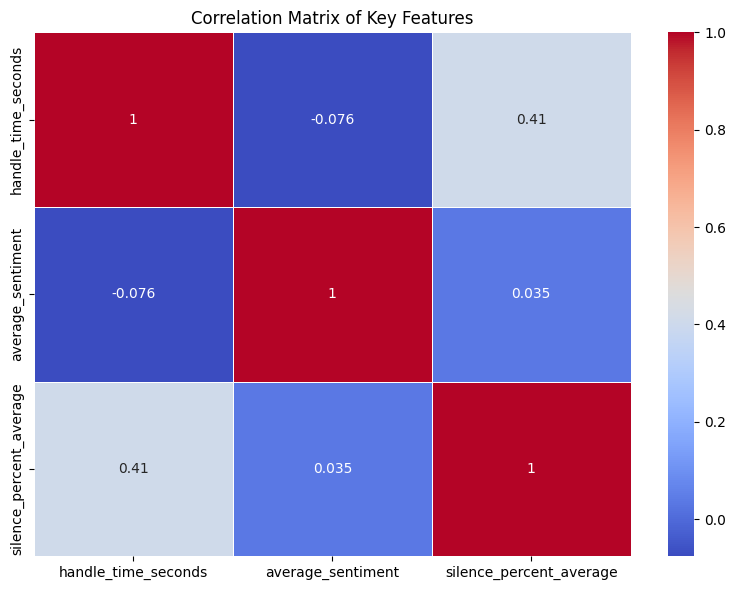

In [9]:
# Select relevant numeric columns for correlation
numeric_columns = ['handle_time', 'average_sentiment', 'silence_percent_average']

# Convert handling time to total seconds for correlation analysis
merged_df['handle_time_seconds'] = merged_df['handle_time'].dt.total_seconds()

# Calculate correlation matrix
corr_matrix = merged_df[['handle_time_seconds', 'average_sentiment', 'silence_percent_average']].corr()

# Plot correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Key Features')
plt.tight_layout()
plt.show()


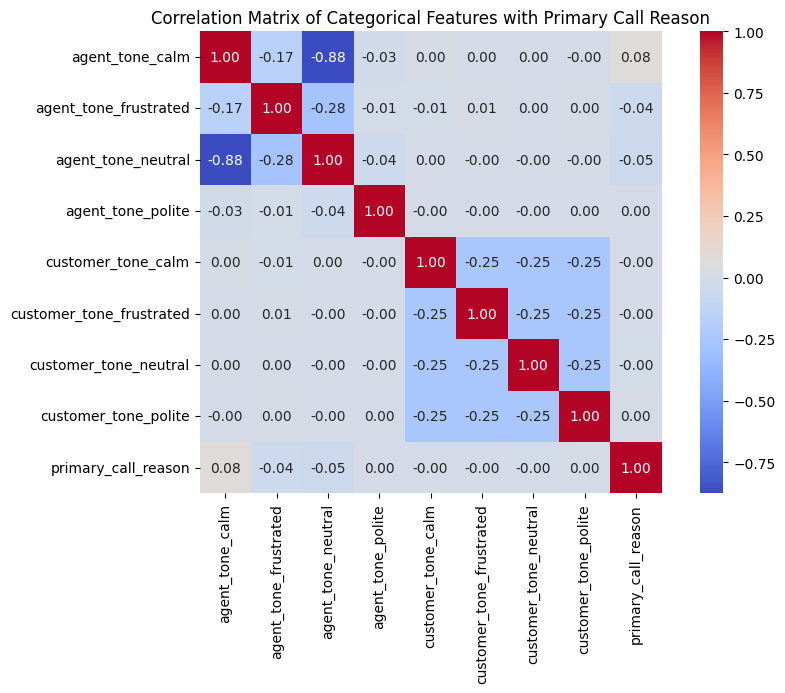

Correlation with primary_call_reason:
agent_tone_calm             0.077706
agent_tone_frustrated      -0.044237
agent_tone_neutral         -0.048657
agent_tone_polite           0.002094
customer_tone_calm         -0.001057
customer_tone_frustrated   -0.000169
customer_tone_neutral      -0.004981
customer_tone_polite        0.003372
Name: primary_call_reason, dtype: float64


In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample dataset (replace this with your merged_df)
# merged_df = pd.read_csv('your_data.csv')

# Convert categorical features to numeric using One-Hot Encoding
categorical_features = ['agent_tone', 'customer_tone']  # Add other categorical features as necessary

# One-Hot Encoding
encoded_df = pd.get_dummies(merged_df[categorical_features], drop_first=True)

# Combine with the primary call reason
encoded_df['primary_call_reason'] = merged_df['primary_call_reason']

# Use Label Encoding for the primary_call_reason (if not done already)
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
encoded_df['primary_call_reason'] = label_encoder.fit_transform(encoded_df['primary_call_reason'])

# Calculate the correlation matrix
correlation_matrix = encoded_df.corr()

# Extract correlation values related to primary_call_reason
primary_reason_corr = correlation_matrix['primary_call_reason'].drop('primary_call_reason')

# Plotting the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix of Categorical Features with Primary Call Reason')
plt.show()

# Display the correlation with primary_call_reason
print("Correlation with primary_call_reason:")
print(primary_reason_corr)
